1. ĐỌC FILE DỮ LIỆU CSV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
from scipy.stats import norm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')

18095

3. KIỂM TRA XEM CÓ DỮ LIỆU NÀO BỊ LỖI KHÔNG 

In [32]:
a = df[(df['TMIN'] > df['TAVG']) & (df['TAVG'] > df['TMAX'])]
a


,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER,ISOUTLIER_MAX,ISOUTLIER_MIN


In [33]:
# kiểm tra xem có bản ghi nào trùng lặp ko
df[df.duplicated()]

,DATE,STATION,TMAX,TMIN,TAVG,PRCP,YEAR,MONTH,SEASON,ISOUTLIER,ISOUTLIER_MAX,ISOUTLIER_MIN


6. NHIỆT ĐỘ TRUNG BÌNH THEO NĂM TRONG PHẠM VI

In [34]:
# temp_avg theo năm
df1 = df[df['ISOUTLIER']==False].groupby('YEAR')['TAVG'].mean().reset_index().round(1)
df1.to_csv('temp_year.csv',index= False)

8. NHIỆT ĐỘ MAX, MIN VÀ BIÊN ĐỘ NHIỆT THEO NĂM

In [ ]:
# Tính nhiệt độ lớn nhất và nhỏ nhất theo từng năm
temp_max = df.groupby('YEAR')['TMAX'].max().reset_index(name= 'TMAX')
temp_min = df.groupby('YEAR')['TMIN'].min().reset_index(name= 'TMIN')
# Tính biên độ dao động nhiệt theo năm
df1 = df1.merge(temp_max, on='YEAR', how='left')
df1 = df1.merge(temp_min, on='YEAR', how='left')
df1

18095

9. XÁC ĐỊNH TUẦN SUẤT NHIỆT CỰC ĐOAN

In [36]:
hot_ = df[df['TMAX']>37].groupby('YEAR')['TMAX'].count().reset_index(name='frequency_hot')
cold_ = df[df['TMIN']<5].groupby('YEAR')['TMIN'].count().reset_index(name='frequency_cold')
df1 = df1.merge(hot_,on='YEAR',how='left')
df1 = df1.merge(cold_,on='YEAR',how='left')
# Thay thế các giá trị NaN trong cột 'frequency_cold' bằng 0
df1['frequency_hot'] = df1['frequency_hot'].fillna(0).astype(int)
df1['frequency_cold'] = df1['frequency_cold'].fillna(0).astype(int)
df1.to_csv('temp_year.csv',index=False)

In [65]:
df[['TMAX','TMIN','TAVG']].describe()

,TMAX,TMIN,TAVG
count,18095.000000,18095.000000,18095.000000
mean,27.449577,19.722581,23.462907
std,6.001191,5.480586,5.407985
min,4.400000,-2.300000,2.800000
25%,23.400000,16.100000,20.000000
50%,28.300000,21.100000,24.400000
75%,32.200000,23.900000,27.800000
max,41.600000,31.100000,36.100000


10. VẼ ĐỒ THỊ

Text(0.5, 1.0, 'nhiệt độ trung bình theo năm')

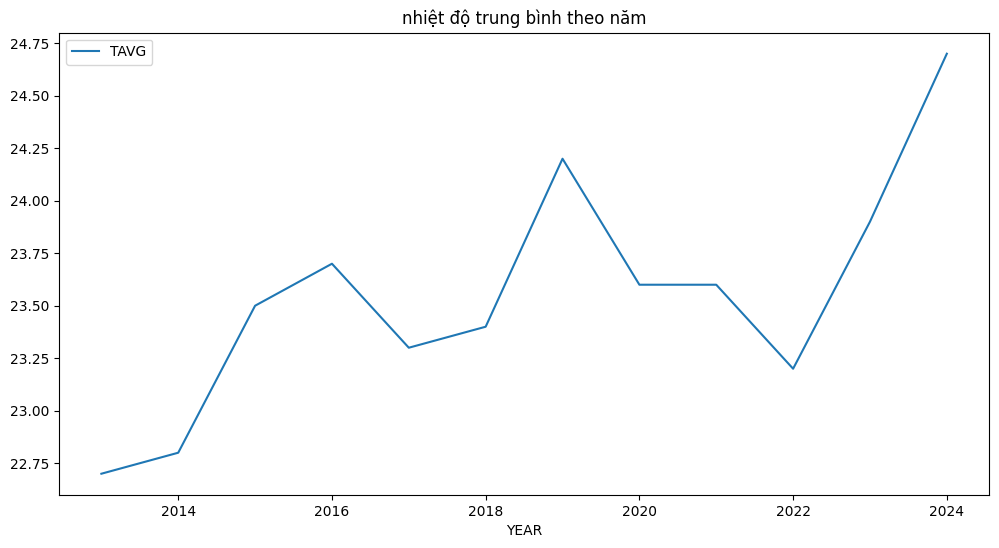

In [37]:
df1.plot(kind= 'line',x='YEAR',y='TAVG',figsize=(12,6))
plt.title('nhiệt độ trung bình theo năm')

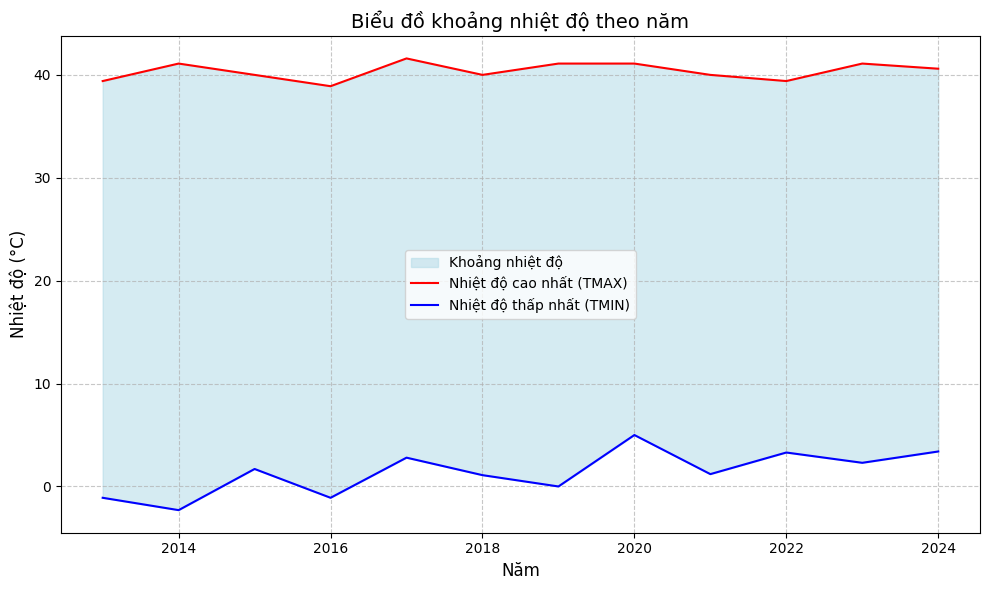

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Vẽ biểu đồ vùng
plt.figure(figsize=(10, 6))
plt.fill_between(df1['YEAR'], df1['TMAX'], df1['TMIN'], color='lightblue', alpha=0.5, label='Khoảng nhiệt độ')
plt.plot(df1['YEAR'], df1['TMAX'], color='red', label='Nhiệt độ cao nhất (TMAX)')
plt.plot(df1['YEAR'], df1['TMIN'], color='blue', label='Nhiệt độ thấp nhất (TMIN)')

# Cấu hình biểu đồ
plt.title('Biểu đồ khoảng nhiệt độ theo năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Nhiệt độ (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [39]:
fig = px.bar(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    barmode='group',  # Grouped bar chart
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='So sánh tần số nhiệt độ cực đoan theo năm (Hot và Cold)',
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


In [40]:
fig = px.line(
    df1,
    x='YEAR',
    y=['frequency_hot', 'frequency_cold'],
    labels={'value': 'Tần số xuất hiện', 'YEAR': 'Năm'},
    title='Xu hướng tần số nhiệt độ cực đoan theo năm',
    markers=True,
    color_discrete_sequence=['salmon', 'skyblue']
)
fig.show()


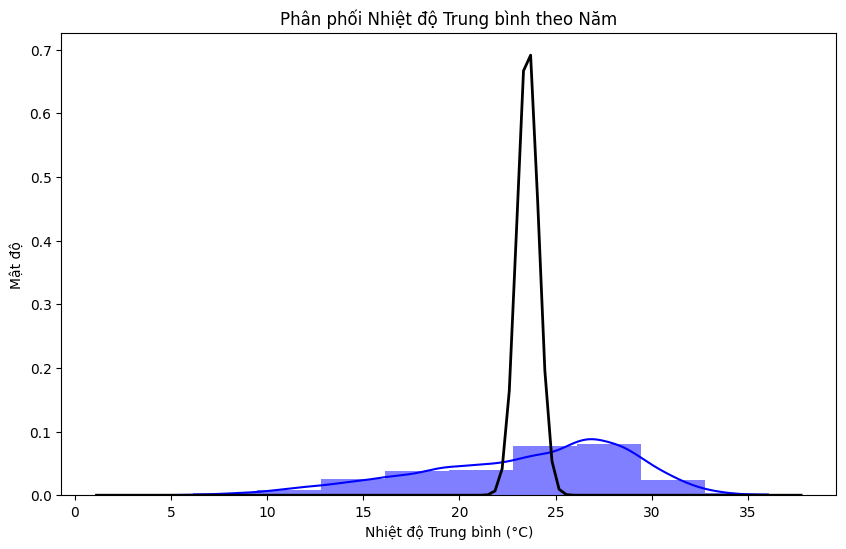

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TAVG'], kde=True, color='blue', bins=10, stat='density', linewidth=0)

# Tính toán các tham số cho phân phối chuẩn (mean và std dev)
mean = df1['TAVG'].mean()
std_dev = df1['TAVG'].std()

# Vẽ đường phân phối chuẩn
xmin, xmax = plt.xlim()  # Lấy phạm vi của trục x
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Thêm tiêu đề và nhãn
plt.title('Phân phối Nhiệt độ Trung bình theo Năm')
plt.xlabel('Nhiệt độ Trung bình (°C)')
plt.ylabel('Mật độ')

# Hiển thị đồ thị
plt.show()

In [42]:
check =(df['ISOUTLIER'] == False) & (df['ISOUTLIER_MAX'] == False) & (df['ISOUTLIER_MIN'] == False)
corr = df[check]
df_corr = corr.groupby(['MONTH','YEAR'])['TAVG'].mean().reset_index()
df_corr1 = corr.groupby(['MONTH','YEAR'])['TMIN'].min().reset_index()
df_corr2 = corr.groupby(['MONTH','YEAR'])['TMAX'].max().reset_index()
df_corr3 = corr.groupby(['MONTH','YEAR'])['PRCP'].sum().reset_index()
df_corr = df_corr.merge(df_corr1,on=['YEAR','MONTH'],how='left')
df_corr = df_corr.merge(df_corr2,on=['YEAR','MONTH'],how='left')
df_corr = df_corr.merge(df_corr3,on=['YEAR','MONTH'],how='left')
df_corr = df_corr[df_corr['YEAR'].isin([2021,2022,2023,2024])]
df_corr.columns = df_corr.columns.str.lower()
df_corr.to_csv('correlate.csv',index=False)

11. DỰ BÁO NHIỆT ĐỘ

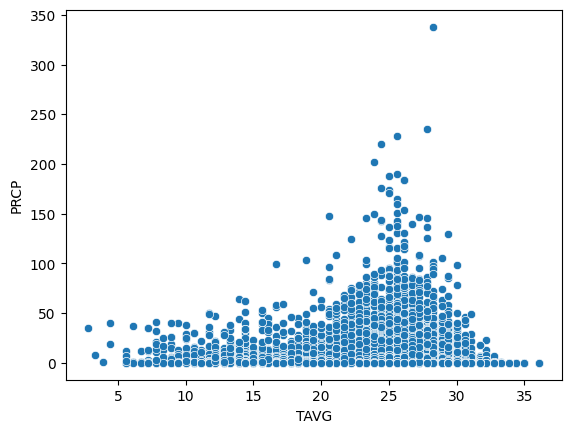

In [43]:
sns.scatterplot(
    data=df,
    x = 'TAVG',
    y = 'PRCP'
)
plt.show()

In [44]:
# đặt 2 vector là x và y
x = df['TAVG'].values
y = df['PRCP'].values
# tìm m và b trong phương trình y = m*x+b
N = x.shape[0] # lấy số lượng hàng của x
m = (N*np.sum(x*y)-np.sum(x)*np.sum(y))/(N*np.sum(x**2)-(np.sum(x)**2))
b = (np.sum(y)-m*np.sum(x))/N
print(m,b)


0.16800658472450541 0.31404288371394534


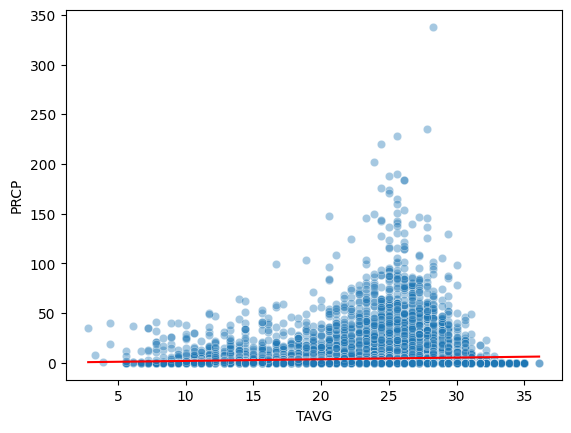

In [45]:
# vẽ
x_min = np.min(x)
y_min = m*x_min+b
x_max = np.max(x)
y_max = m*x_max+b
fig,ax = plt.subplots()
sns.scatterplot(
    data= df,
    x = 'TAVG',
    y = 'PRCP',
    ax=ax,
    alpha = 0.4
)
sns.lineplot(
    x = [x_min,x_max],
    y = [y_min,y_max],
    linewidth = 1.5,
    color = 'red'
)
plt.show()

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2013-01-01,12.440000,14.540000,10.100000,0.000000
2013-01-02,14.440000,17.240000,10.120000,0.000000
2013-01-03,12.000000,14.120000,9.880000,2.134000
2013-01-04,10.120000,11.680000,9.000000,0.000000
2013-01-05,9.900000,12.220000,7.900000,0.254000
...,...,...,...,...
2024-11-26,18.133333,21.833333,15.533333,1.016667
2024-11-27,17.800000,19.900000,15.700000,0.000000
2024-11-28,17.000000,20.780000,13.380000,0.000000


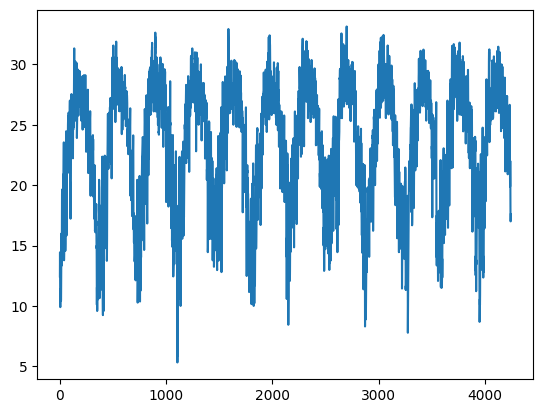

In [46]:
df = df.groupby(['DATE'])[['TAVG','TMAX','TMIN','PRCP']].mean().reset_index()
df['TAVG'].plot()
df.set_index(df['DATE'],inplace=True)
df = df.drop('DATE',axis=1)
df

In [47]:
df["target"] = df.shift(-1)["TAVG"]
df = df.ffill()
rr = Ridge(alpha=.1)
predictors = df.columns[~df.columns.isin(['YEAR','MONTH','target'])]
def backtest(weather, model, predictors, start=1, step=1):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)
predictions = backtest(df, rr, predictors)
predictions

,actual,prediction,diff
DATE,,,
2013-01-02,12.00,14.440000,2.440000
2013-01-03,10.12,14.847375,4.727375
2013-01-04,9.90,16.548605,6.648605
2013-01-05,10.44,4.963981,5.476019
2013-01-06,10.90,9.681157,1.218843
...,...,...,...
2024-11-26,17.80,18.576398,0.776398
2024-11-27,17.00,18.267154,1.267154
2024-11-28,17.10,17.293089,0.193089


In [48]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.271429511860814

In [49]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2017-03-24,12.800000,26.051281,13.251281
2021-11-07,15.600000,24.069097,8.469097
2013-01-31,20.120000,11.767735,8.352265
2018-02-21,14.750000,22.848706,8.098706
2022-02-18,11.340000,19.297007,7.957007
...,...,...,...
2015-05-30,29.266667,29.268514,0.001848
2021-07-30,28.900000,28.901809,0.001809
2018-03-29,23.000000,23.001595,0.001595


In [50]:
pd.Series(rr.coef_, index=predictors)

TAVG    0.705566
TMAX    0.046260
TMIN    0.193397
PRCP    0.015892
dtype: float64

In [51]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP",'TAVG']:
        df = compute_rolling(df, horizon, col)

In [52]:
def expand_mean(df):
    return df.expanding(1).mean()
df.index = pd.to_datetime(df.index)
for col in ["TMAX", "TMIN", "PRCP",'TAVG']:
    df[f"month_avg_{col}"] = df[col].groupby(df.index.month, group_keys=False).apply(expand_mean)
    df[f"day_avg_{col}"] = df[col].groupby(df.index.day_of_year, group_keys=False).apply(expand_mean)

In [53]:
df = df.iloc[14:,:]
df = df.fillna(0)
df

,TAVG,TMAX,TMIN,PRCP,target,rolling_3_TMAX,rolling_3_TMAX_pct,rolling_3_TMIN,rolling_3_TMIN_pct,rolling_3_PRCP,...,rolling_14_TAVG,rolling_14_TAVG_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP,month_avg_TAVG,day_avg_TAVG
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-15,14.560000,15.900000,13.000000,0.456000,16.00,16.633333,-0.044088,10.140000,0.282051,0.152000,...,11.667143,0.247949,13.882667,15.900000,9.526667,13.000000,0.334933,0.456000,11.718667,14.560000
2013-01-16,16.000000,18.220000,13.980000,0.408000,15.12,16.746667,0.087978,12.246667,0.141535,0.288000,...,11.778571,0.358399,14.153750,18.220000,9.805000,13.980000,0.339500,0.408000,11.986250,16.000000
2013-01-17,15.120000,17.340000,12.900000,2.386000,13.34,17.153333,0.010882,13.293333,-0.029589,1.083333,...,12.001429,0.259850,14.341176,17.340000,9.987059,12.900000,0.459882,2.386000,12.170588,15.120000
2013-01-18,13.340000,15.120000,11.780000,0.204000,14.46,16.893333,-0.104972,12.886667,-0.085877,0.999333,...,12.231429,0.090633,14.384444,15.120000,10.086667,11.780000,0.445667,0.204000,12.235556,13.340000
2013-01-19,14.460000,17.760000,11.140000,0.000000,17.36,16.740000,0.060932,11.940000,-0.067002,0.863333,...,12.557143,0.151536,14.562105,17.760000,10.142105,11.140000,0.422211,0.000000,12.352632,14.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-26,18.133333,21.833333,15.533333,1.016667,17.80,23.684444,-0.078157,16.697778,-0.069736,0.338889,...,22.552976,-0.195967,25.388714,24.006111,17.654017,16.311944,1.680556,0.410681,21.460063,20.068194
2024-11-27,17.800000,19.900000,15.700000,0.000000,17.00,22.911111,-0.131426,16.451111,-0.045657,0.338889,...,22.294405,-0.201593,25.372896,23.618056,17.648386,15.933333,1.675713,0.211667,21.449515,19.630694
2024-11-28,17.000000,20.780000,13.380000,0.000000,17.10,20.837778,-0.002773,14.871111,-0.100269,0.338889,...,21.860476,-0.222341,25.359698,24.142778,17.636121,16.233333,1.670898,0.025500,21.436729,20.077222


In [54]:
predictions = backtest(df, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.2722044770826262

In [55]:
mean_squared_error(predictions["actual"], predictions["prediction"])

2.9407473616794877

In [56]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2017-03-24,12.800,26.048038,13.248038
2013-01-31,20.120,7.371652,12.748348
2021-11-07,15.600,24.066371,8.466371
2018-02-21,14.750,22.845358,8.095358
2022-02-18,11.340,19.303831,7.963831
...,...,...,...
2021-07-30,28.900,28.899034,0.000966
2016-04-19,23.220,23.219495,0.000505
2017-01-19,16.500,16.500497,0.000497


<Axes: xlabel='diff'>

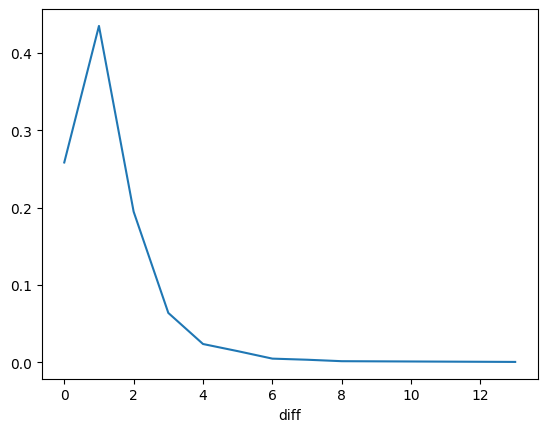

In [57]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

<Axes: xlabel='DATE'>

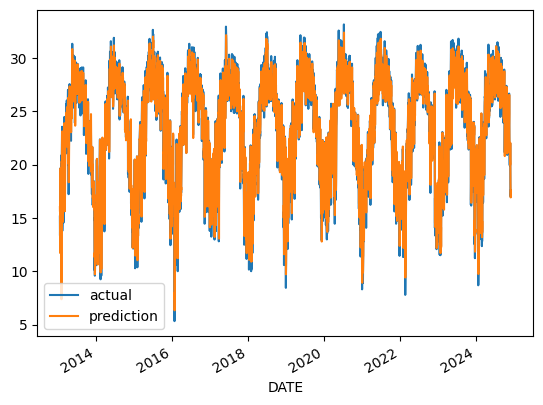

In [58]:
predictions[['actual','prediction']].plot()